In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/hr-analytics-analytics-vidya/train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.tail()
df.shape

(54808, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
print("There are {} duplicate records.".format(df.shape[0] - len(df['employee_id'].unique())))

There are 0 duplicate records.


In [7]:
df.drop('employee_id', axis = 1, inplace = True)
list(df.columns)

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [8]:
col_name = df.columns.to_list()
for i in col_name:
    print("In the column - {}:".format(i))
    print("There are {0} Unique values".format(len(df[i].unique())))
    print("Unique vales in the column are - \n{}".format(list(df[i].unique())))
    print("")

In the column - department:
There are 9 Unique values
Unique vales in the column are - 
['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']

In the column - region:
There are 34 Unique values
Unique vales in the column are - 
['region_7', 'region_22', 'region_19', 'region_23', 'region_26', 'region_2', 'region_20', 'region_34', 'region_1', 'region_4', 'region_29', 'region_31', 'region_15', 'region_14', 'region_11', 'region_5', 'region_28', 'region_17', 'region_13', 'region_16', 'region_25', 'region_10', 'region_27', 'region_30', 'region_12', 'region_21', 'region_8', 'region_32', 'region_6', 'region_33', 'region_24', 'region_3', 'region_9', 'region_18']

In the column - education:
There are 4 Unique values
Unique vales in the column are - 
["Master's & above", "Bachelor's", nan, 'Below Secondary']

In the column - gender:
There are 2 Unique values
Unique vales in the column are - 
['f', 'm']

In the column - recruitment_channel:


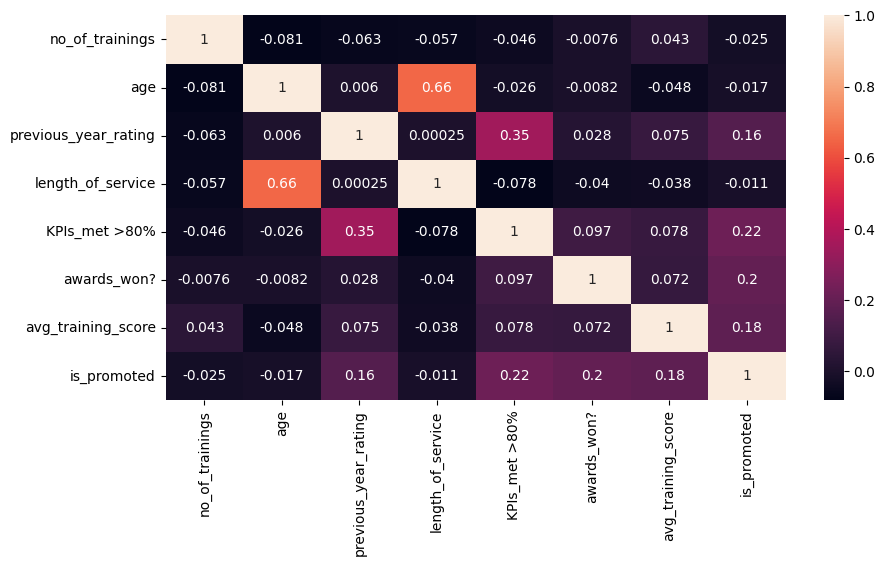

In [9]:
df_numeric = df[['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']]
plt.figure(figsize = (10,5))
sns.heatmap(df_numeric.corr(), annot = True)
plt.show()

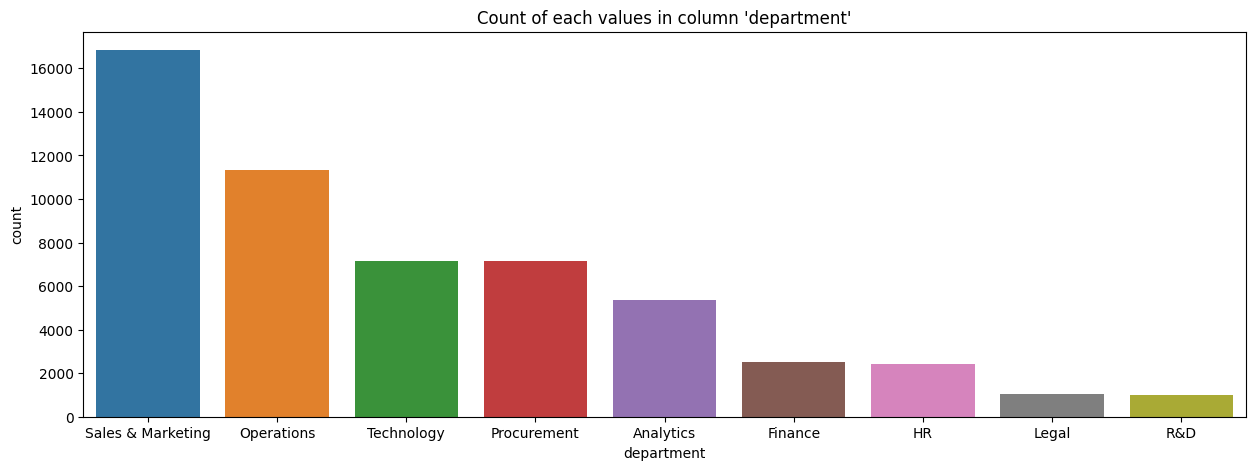

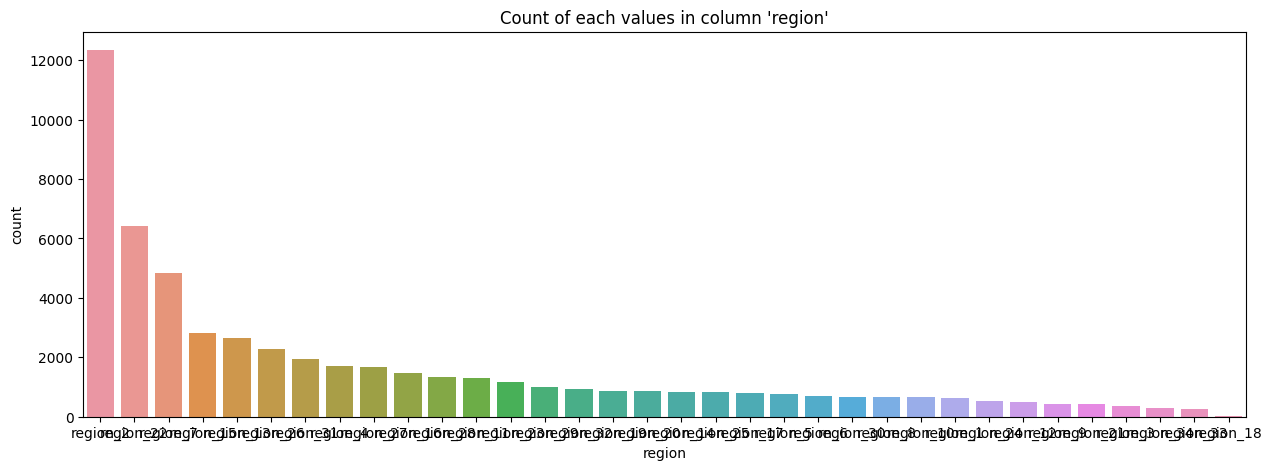

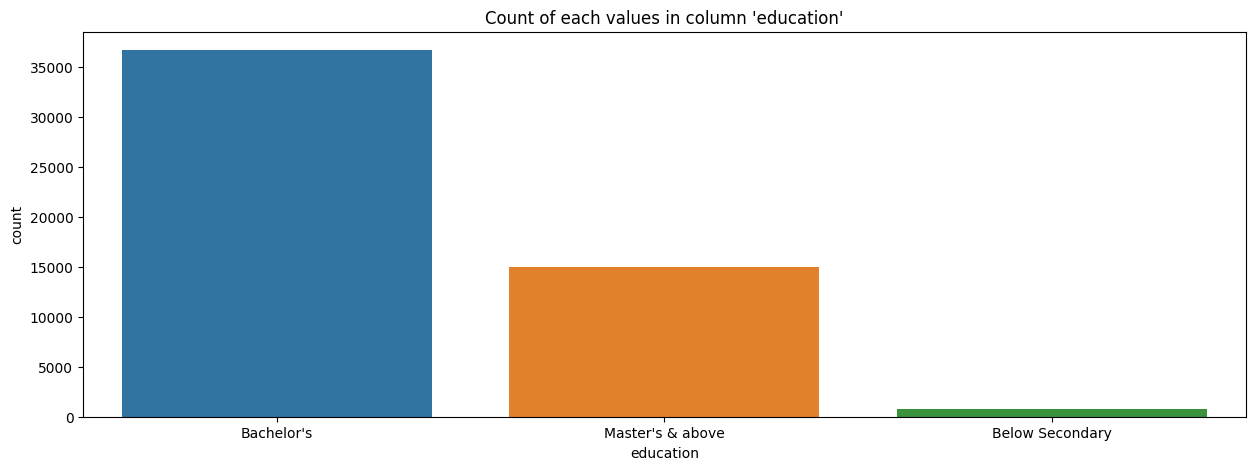

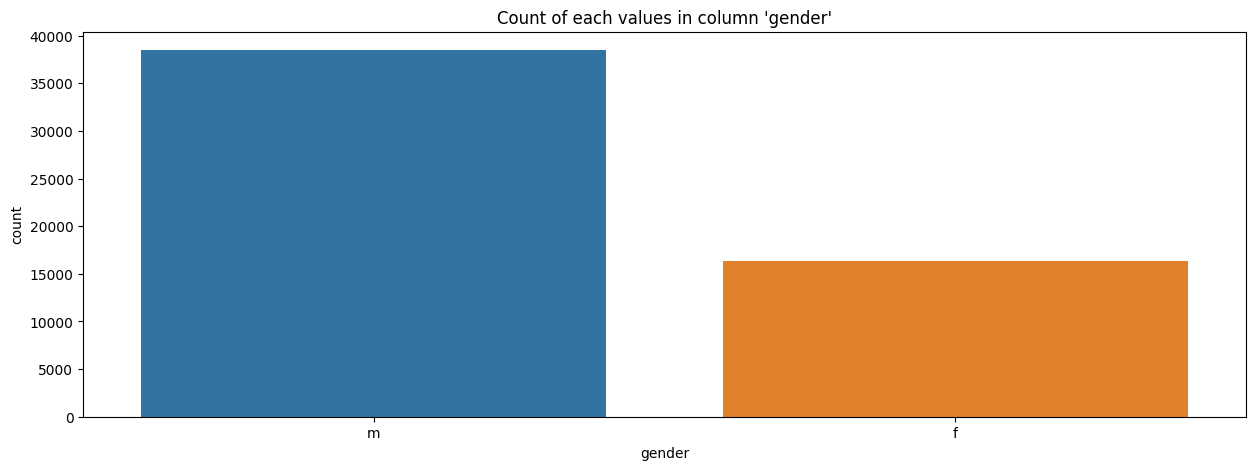

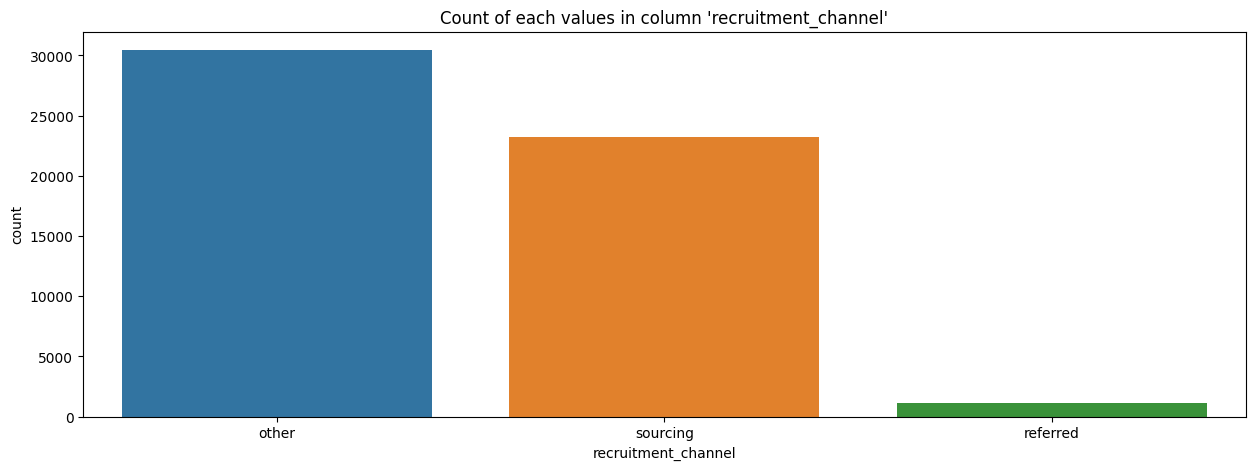

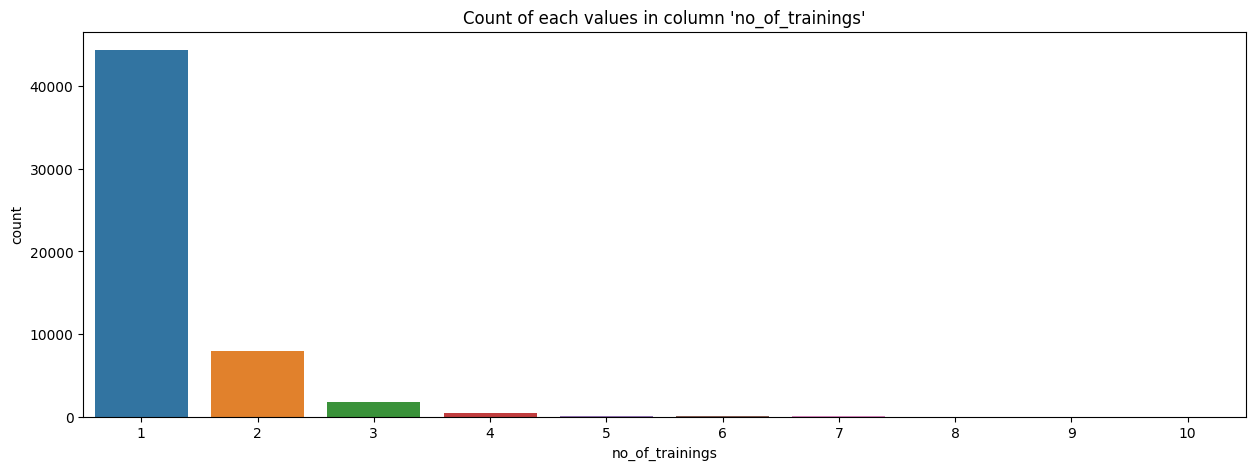

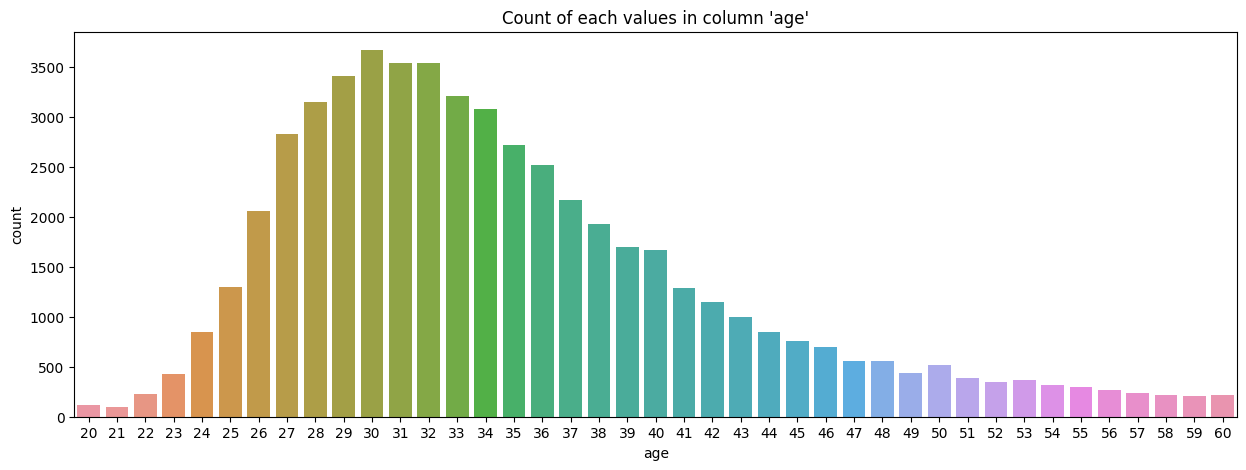

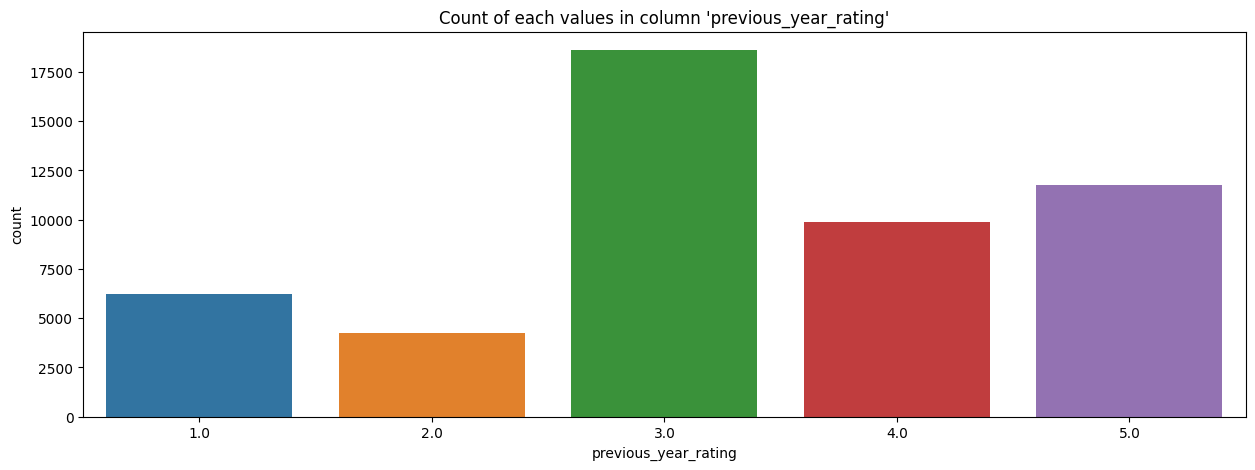

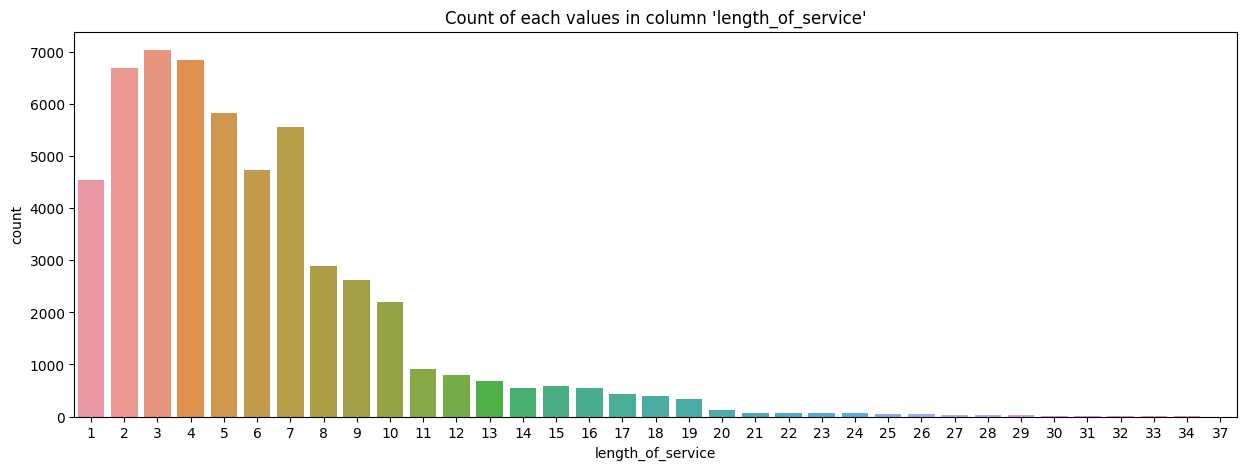

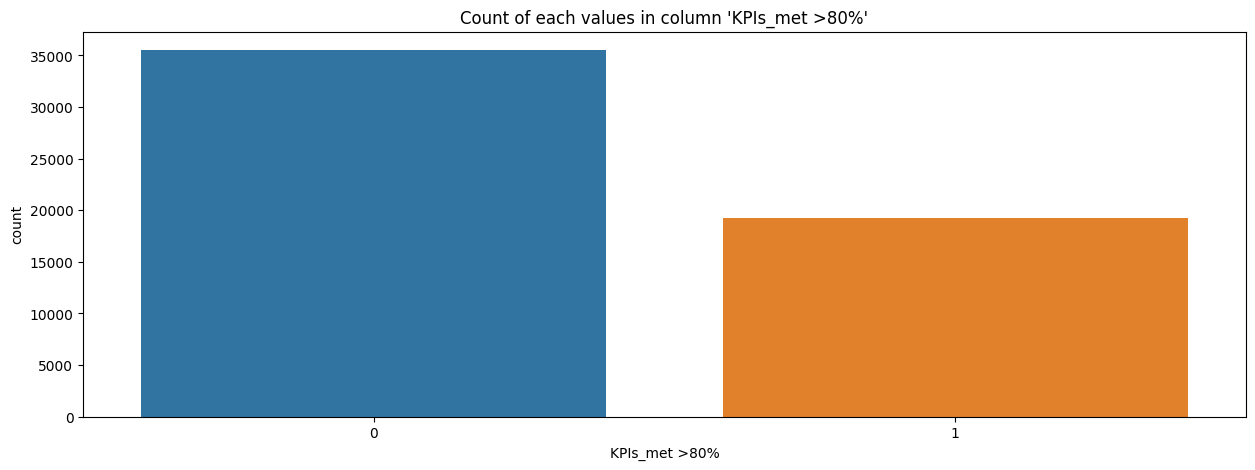

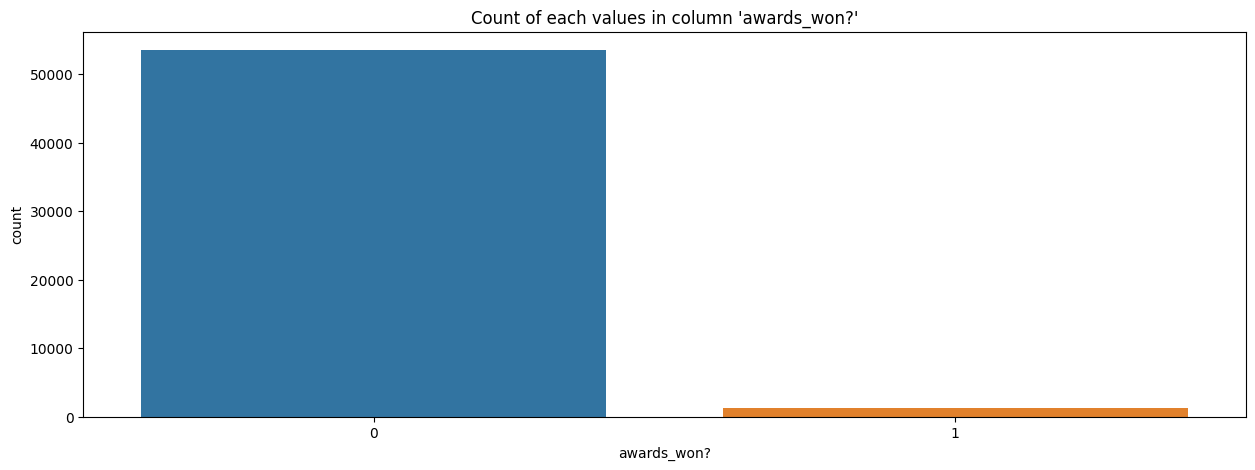

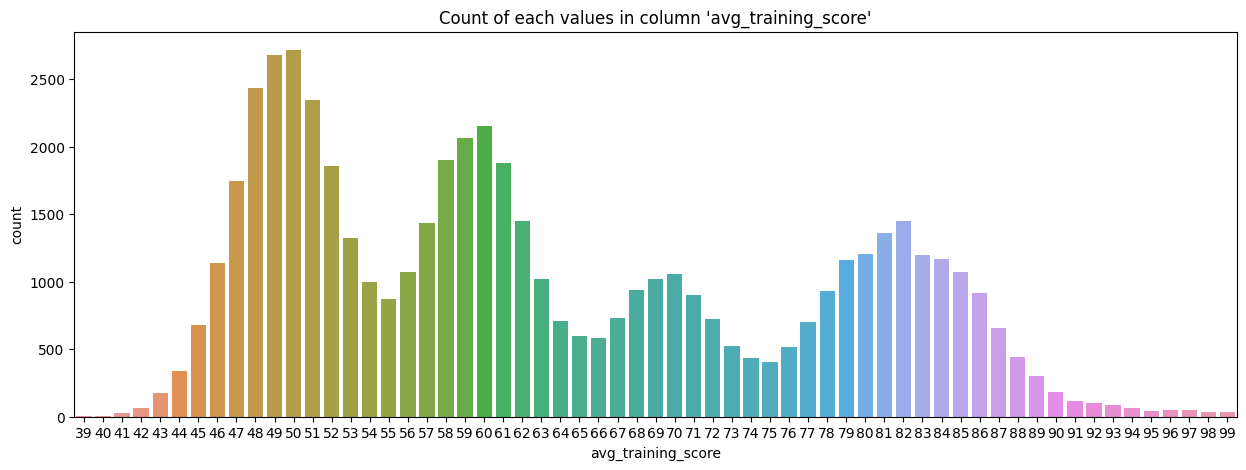

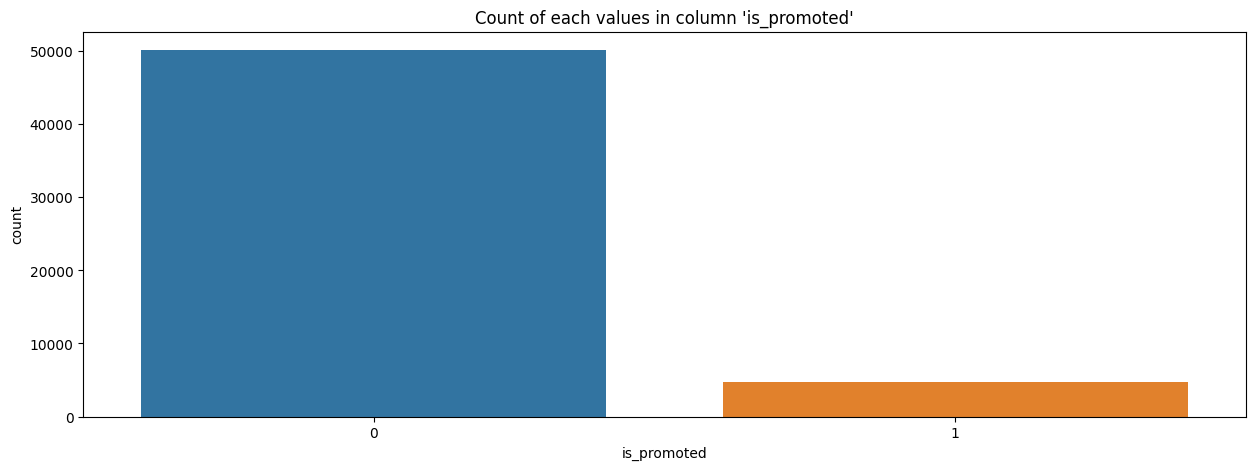

In [10]:
for i in col_name:
    plt.figure(figsize=(15,5))
    plt.title("Count of each values in column '{}'".format(i))
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts())
    plt.show()

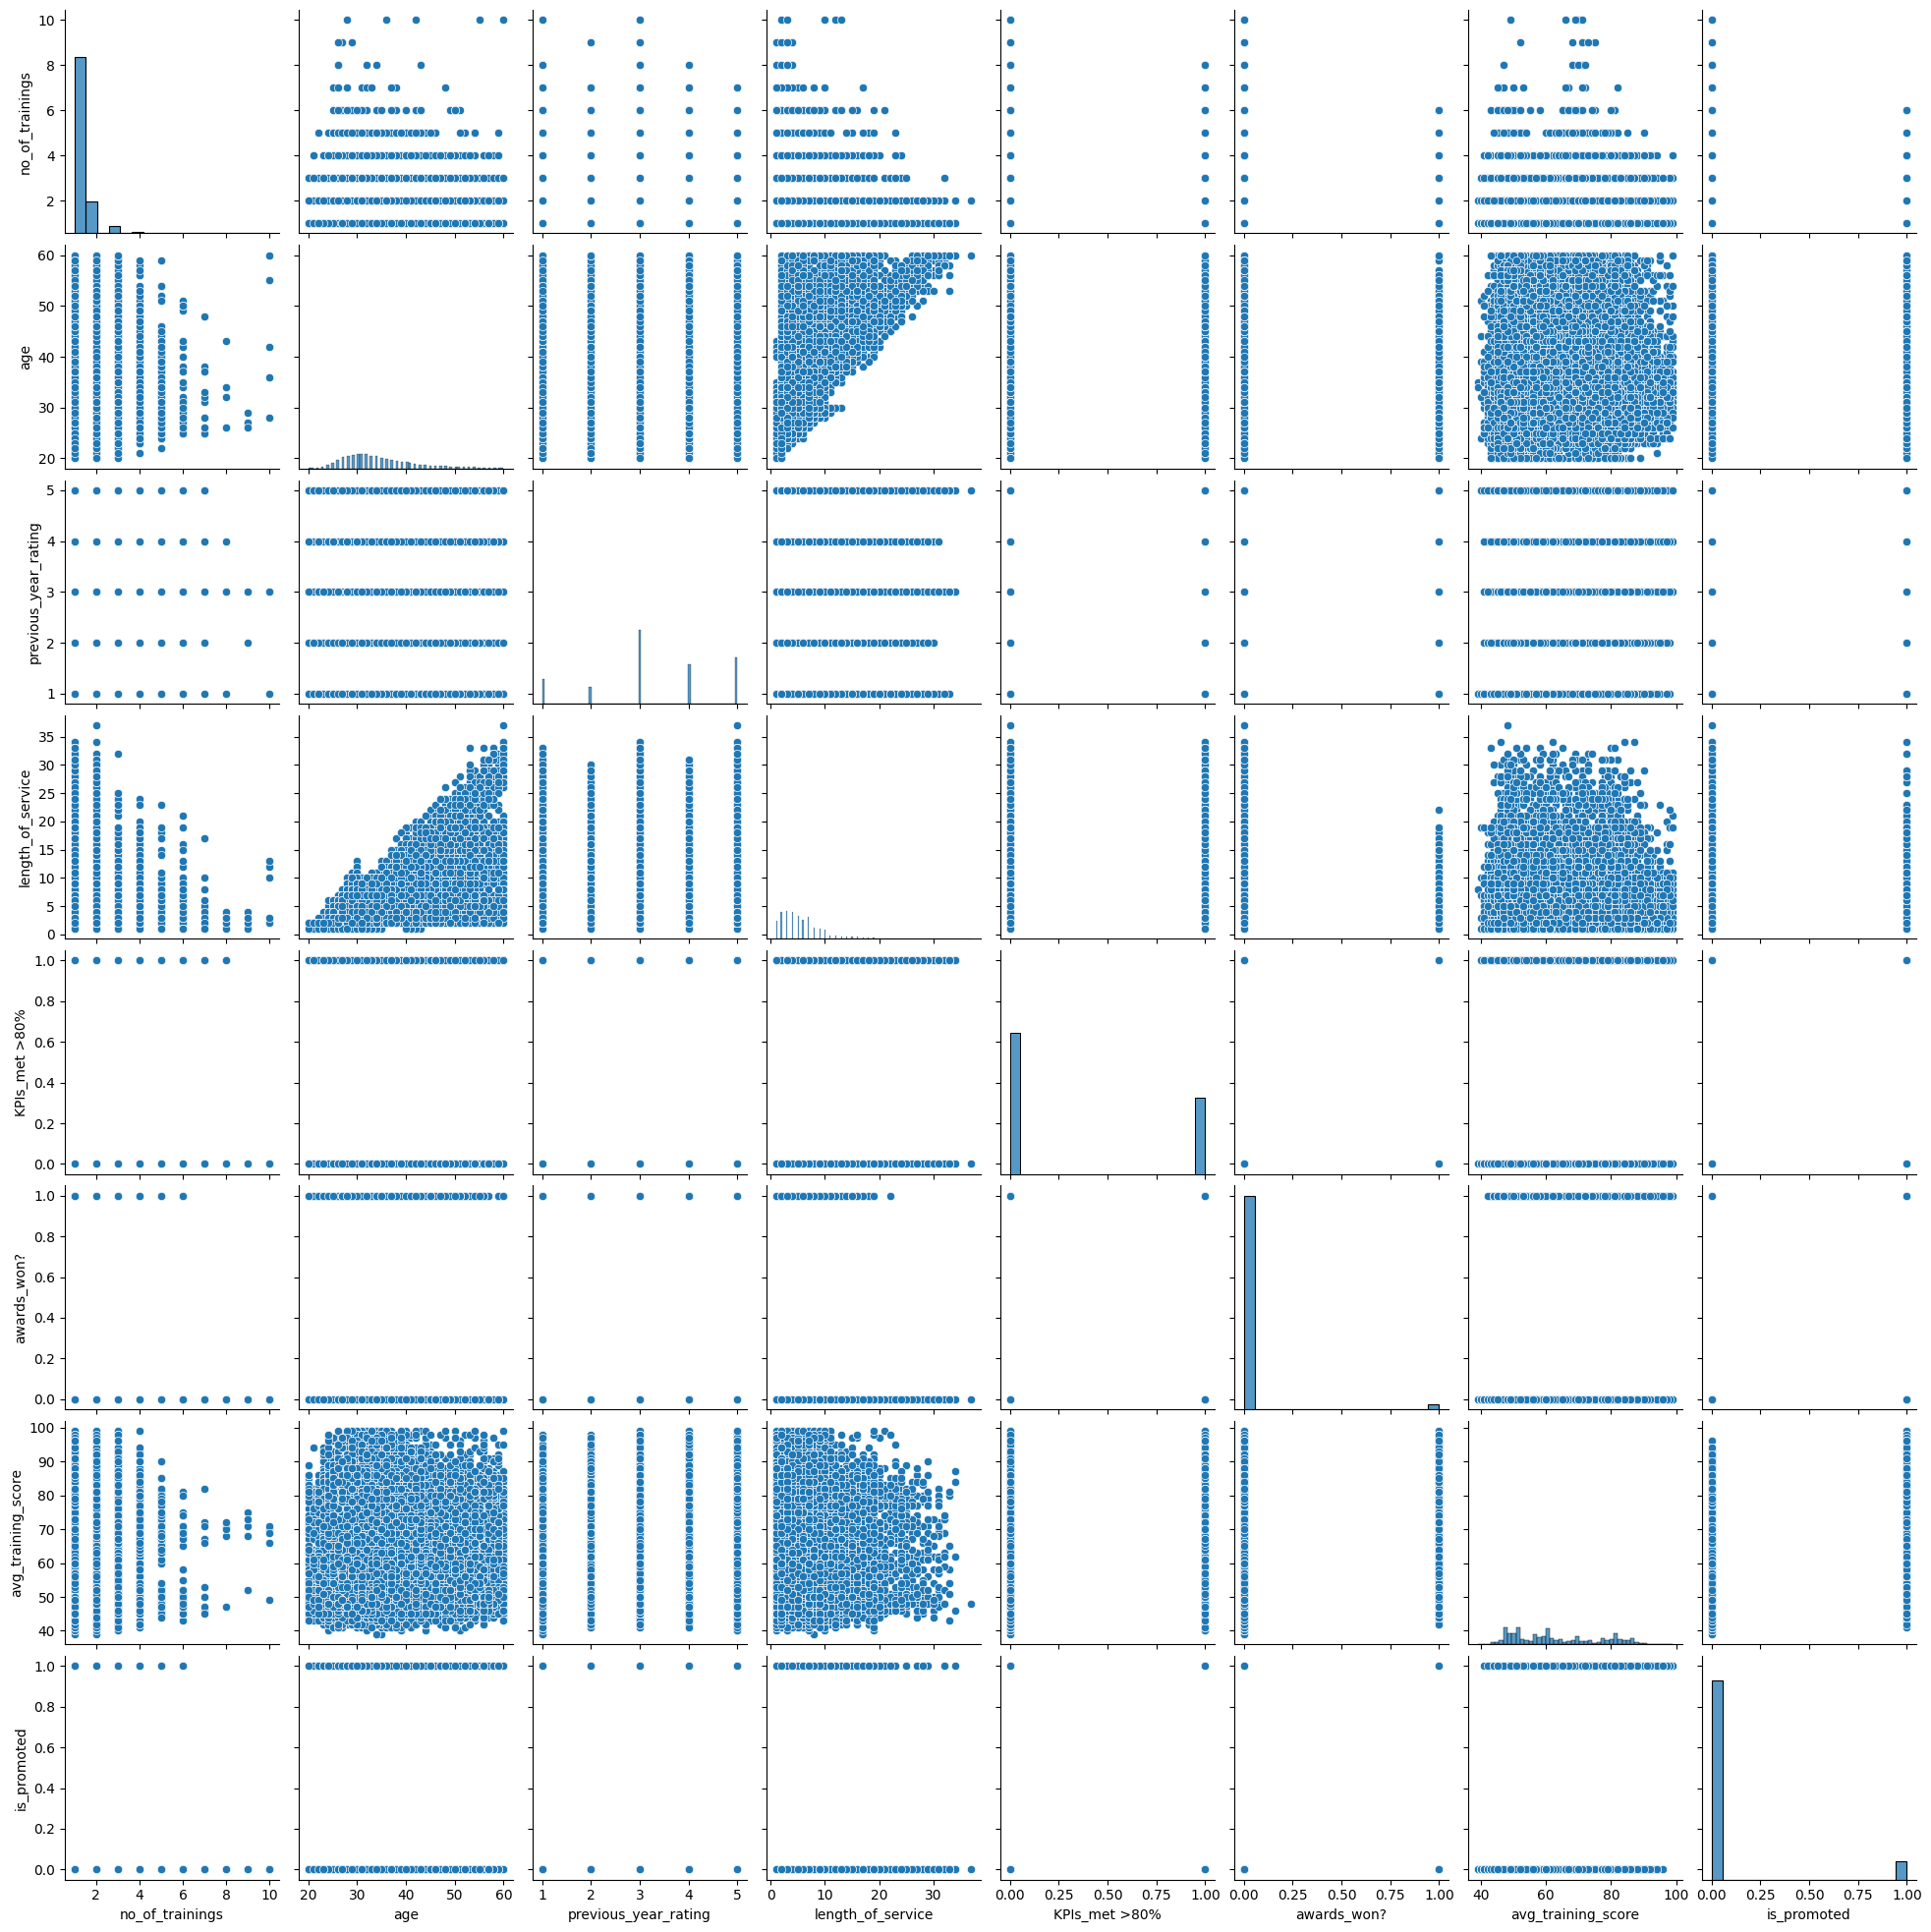

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df['education'] = df['education'].ffill()
df['previous_year_rating'] = df['previous_year_rating'].fillna(0.0)

In [13]:
df['age'] = pd.cut(x = df['age'], bins = [20,29,39,49], labels=["20 to 30",'30 to 40','40+'])
df['age'] = df['age'].astype('object')

In [14]:
X = df.drop('is_promoted', axis = 1)
y = df['is_promoted']

In [15]:
X_encode = pd.get_dummies(X,drop_first = True)

In [16]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
X_standard = scaler.fit_transform(X_encode)
X_standard = pd.DataFrame(X_standard, columns = X_encode.columns)
X_standard.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,age_30 to 40,age_40+
0,0.0,1.0,0.75,1.0,0.0,-0.44,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,-0.25,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.50,0.0,0.0,-0.40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,-1.0,1.25,0.0,0.0,-0.40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.75,0.0,0.0,0.52,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [17]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=5,subsample = 0.70,
                                            verbosity = 0, scale_pos_weight = 2.5,
                                            base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.085, max_depth=5,
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1,
                                             max_bin = 60,num_leaves = 300, boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=500, max_depth=5, scale_pos_weight=2.5)}

In [18]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators=[
    ('XGBoost_Best', list(Classifiers.values())[0]), 
    ('CatBoost_Best', list(Classifiers.values())[1]),
    ('LightGBM_Best', list(Classifiers.values())[2]),
], 
voting='soft', weights=[2, 1, 3])


vc_model.fit(X_standard, y)


0:	learn: 0.5647893	total: 66.1ms	remaining: 33s
1:	learn: 0.4834554	total: 73.3ms	remaining: 18.3s
2:	learn: 0.4509078	total: 79.7ms	remaining: 13.2s
3:	learn: 0.4144819	total: 85.7ms	remaining: 10.6s
4:	learn: 0.3983357	total: 91.4ms	remaining: 9.05s
5:	learn: 0.3844974	total: 98.1ms	remaining: 8.08s
6:	learn: 0.3660705	total: 104ms	remaining: 7.33s
7:	learn: 0.3535479	total: 111ms	remaining: 6.8s
8:	learn: 0.3437999	total: 117ms	remaining: 6.39s
9:	learn: 0.3358628	total: 124ms	remaining: 6.05s
10:	learn: 0.3240180	total: 130ms	remaining: 5.76s
11:	learn: 0.3228668	total: 136ms	remaining: 5.52s
12:	learn: 0.3187803	total: 142ms	remaining: 5.31s
13:	learn: 0.3169060	total: 148ms	remaining: 5.14s
14:	learn: 0.3134377	total: 154ms	remaining: 4.99s
15:	learn: 0.3118336	total: 160ms	remaining: 4.85s
16:	learn: 0.3110087	total: 167ms	remaining: 4.74s
17:	learn: 0.3036192	total: 173ms	remaining: 4.64s
18:	learn: 0.2987856	total: 179ms	remaining: 4.54s
19:	learn: 0.2979292	total: 185ms	rema

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            lea...
                                            random_state=None, ...)),
                             ('CatBoost_Best',
                              <catboost.core.CatBoostClassifier object at 0x7f3c678e5540>),
                             ('LightGBM_Best',
                              LGBMClassifier(boosting_type='dart',
                                             importance_type='gain',
                                             learning_rate=0.15, max_bin=60,
                                             max_depth=5, n_estimators=500,
                                             num_leaves=300, objective='binary',
                                             scale_pos_weight=2.5,
                                             subsample_freq=2, verbosity=-1))],
                 voting='soft', weights=[2, 1, 3])

In [22]:
from sklearn.metrics import accuracy_score

y_train_pred = vc_model.predict(X_standard)

train_accuracy = accuracy_score(y, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9472


In [19]:
df1=pd.read_csv('/kaggle/input/hr-analytics-analytics-vidya/test.csv')
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [20]:
df2 = df1.copy()

df1.drop('employee_id',axis=1,inplace=True)

df1['education'] = df1['education'].ffill()

df1['previous_year_rating'] = df1['previous_year_rating'].fillna(0.0)

df1['age'] = pd.cut(x=df1['age'], bins=[20, 29, 39, 49], labels=['20 to 30', '30 to 40', '40+']) 
df1['age'] = df1['age'].astype('object')

df1_encode = pd.get_dummies(df1,drop_first=True)

scaler = preprocessing.RobustScaler() 
df_standard = scaler.fit_transform(df1_encode) 
df_standard = pd.DataFrame(df_standard, columns =df1_encode.columns)

In [21]:
df2['is_promoted'] = vc_model.predict(df_standard)

df1=df2[['employee_id','is_promoted']]
df1.to_csv('Predict20.csv', index=False)